In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from tensorflow import keras
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,Flatten,Conv2D,BatchNormalization,Activation,Bidirectional,LSTM, Embedding
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

from keras import Input
from keras.layers import TimeDistributed
from keras.layers import RepeatVector

In [3]:
picture_size = 48
folder_path = '/kaggle/input/face-expression-recognition-dataset/images/'

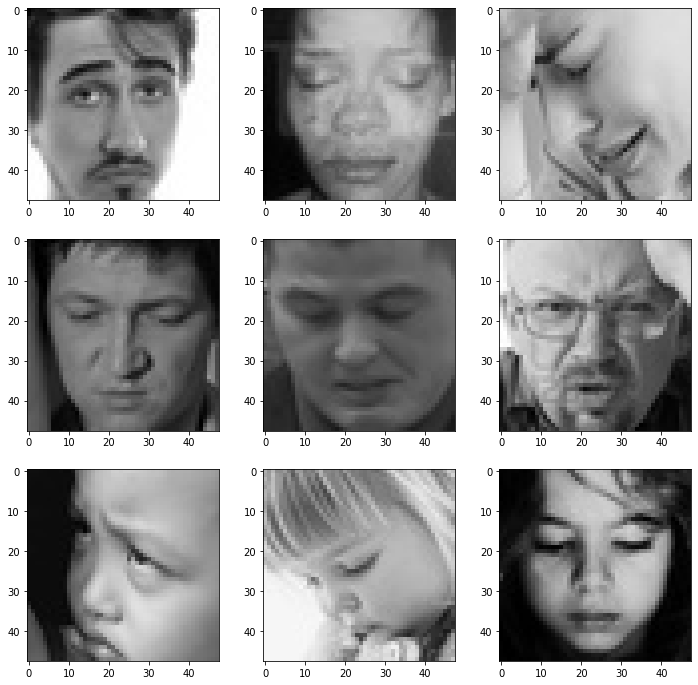

In [4]:
expression = "sad"
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    img = load_img(folder_path + "train/" + expression + "/" + os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

In [5]:
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [6]:
total_images = train_set.n  
steps = total_images//batch_size 
#iterations to cover all data, so if batch is 5, it will take total_images/5  iteration 

x , y = [] , []
for i in range(steps):
    a , b = train_set.next()
    x.extend(a) 
    y.extend(b)
    
xtrain=np.array(x)
ytrain=np.array(y)

In [7]:
print('x_train shape', xtrain.shape)
print('y_train shape', ytrain.shape)
print(xtrain.shape[0], 'x train set')
print(ytrain.shape[0], 'y train set')

x_train shape (28800, 48, 48, 1)
y_train shape (28800, 7)
28800 x train set
28800 y train set


In [8]:
total_images = test_set.n  
steps = total_images//batch_size 
#iterations to cover all data, so if batch is 5, it will take total_images/5  iteration 

x , y = [] , []
for i in range(steps):
    a , b = test_set.next()
    x.extend(a) 
    y.extend(b)
    
xtest=np.array(x)
ytest=np.array(y)

In [9]:
print('x_test shape', xtest.shape)
print('y_test shape', ytest.shape)
print(xtest.shape[0], 'x test set')
print(ytest.shape[0], 'y test set')

x_test shape (7040, 48, 48, 1)
y_test shape (7040, 7)
7040 x test set
7040 y test set


In [10]:
xtrain = xtrain.reshape(xtrain.shape[0],48,48)
xtest = xtest.reshape(xtest.shape[0],48,48)

# ytrain = keras.utils.to_categorical(ytrain, no_of_classes)
# ytest = keras.utils.to_categorical(ytest, no_of_classes)

print(ytrain.shape)
print(xtest.shape)

xtrain = np.array(xtrain).astype('float32')
xtest = np.array(xtest).astype('float32')

xtrain = xtrain/255.0
xtest = xtest/255.0
xtrain[0]

(28800, 7)
(7040, 48, 48)


array([[0.41960785, 0.40392157, 0.40392157, ..., 0.38039216, 0.39215687,
        0.39607844],
       [0.41568628, 0.4       , 0.40784314, ..., 0.38039216, 0.3882353 ,
        0.39215687],
       [0.40784314, 0.39607844, 0.41960785, ..., 0.3764706 , 0.38039216,
        0.38431373],
       ...,
       [0.32941177, 0.31764707, 0.28627452, ..., 0.16862746, 0.17254902,
        0.19607843],
       [0.32941177, 0.3137255 , 0.2901961 , ..., 0.17254902, 0.16862746,
        0.19215687],
       [0.33333334, 0.30588236, 0.3019608 , ..., 0.17254902, 0.18039216,
        0.19215687]], dtype=float32)

In [11]:
no_of_classes = 7
model = Sequential()

#LSTM layer
model.add(LSTM(64, activation='relu', return_sequences=True, kernel_initializer='he_uniform', input_shape=(48,48)))

#Flatten layer
model.add(Flatten())

# #1st dense layer
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

# #2nd dense layer
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

# #3rd dense layer
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

# #4th dense layer
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

# #4th dense layer
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

# #5th dense layer
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

# #5th dense layer
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

#output layer
model.add(Dense(no_of_classes, activation = 'softmax'))

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


2022-11-25 17:46:53.476546: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 17:46:53.580117: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 17:46:53.580876: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 17:46:53.582395: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 48, 64)            28928     
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               2

In [12]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint(filepath = '/kaggle/working/LSTM.h5',
                             monitor="accuracy",
                             verbose=1,
                             save_best_only=True,
                             mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 50

In [13]:
history = model.fit(xtrain,
                    ytrain,
                    steps_per_epoch=train_set.n//train_set.batch_size,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_data = (xtest,ytest),
                    validation_steps = test_set.n//test_set.batch_size,
                    callbacks=callbacks_list)

2022-11-25 17:46:57.099196: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
225/225 [==============================] - 10s 35ms/step - loss: 1.7547 - accuracy: 0.2878 - val_loss: 1.6879 - val_accuracy: 0.3277

Epoch 00001: accuracy improved from -inf to 0.28781, saving model to /kaggle/working/LSTM.h5
Epoch 2/50
225/225 [==============================] - 8s 37ms/step - loss: 1.6529 - accuracy: 0.3492 - val_loss: 1.6354 - val_accuracy: 0.3670

Epoch 00002: accuracy improved from 0.28781 to 0.34920, saving model to /kaggle/working/LSTM.h5
Epoch 3/50
225/225 [==============================] - 7s 32ms/step - loss: 1.6005 - accuracy: 0.3782 - val_loss: 1.6065 - val_accuracy: 0.3750

Epoch 00003: accuracy improved from 0.34920 to 0.37819, saving model to /kaggle/working/LSTM.h5
Epoch 4/50
225/225 [==============================] - 7s 32ms/step - loss: 1.5597 - accuracy: 0.3965 - val_loss: 1.5653 - val_accuracy: 0.3901

Epoch 00004: accuracy improved from 0.37819 to 0.39646, saving model to /kaggle/working/LSTM.h5
Epoch 5/50
225/225 [======================

In [14]:
ytrain[1]

array([0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [15]:
# ypred = model.predict(xtest)
# model.evaluate(xtest,ytest)

In [16]:
# print(ypred.shape)
# np.argmax(ypred[0])
# ypred.shape


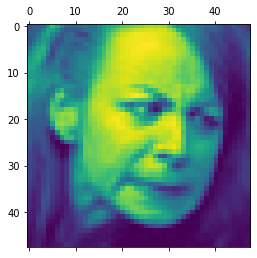

In [17]:
plt.matshow(xtest[0])

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
num_of_test_samples = 7040
Ypred = model.predict(xtest, num_of_test_samples // batch_size+1)
ypred = np.argmax(Ypred, axis=1)
Ytest = np.argmax(ytest, axis=1)
print(Ytest.shape)
print(ypred.shape)
print('Confusion Matrix')
cm = confusion_matrix(Ytest, ypred)
print(cm)
print('Classification Report')
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
print(classification_report(Ytest, ypred, target_names=target_names))

(7040,)
(7040,)
Confusion Matrix
[[ 224    1   75  298  141  129   92]
 [  14    7   11   57   11    4    7]
 [ 118    2  180  269  136  129  184]
 [ 107    3   69 1359   86  126   75]
 [  88    2   77  401  429  113  106]
 [ 145    4   82  345  188  297   78]
 [  40    1   54  131   62   27  456]]
Classification Report
              precision    recall  f1-score   support

       angry       0.30      0.23      0.26       960
     disgust       0.35      0.06      0.11       111
        fear       0.33      0.18      0.23      1018
       happy       0.48      0.74      0.58      1825
     neutral       0.41      0.35      0.38      1216
         sad       0.36      0.26      0.30      1139
    surprise       0.46      0.59      0.52       771

    accuracy                           0.42      7040
   macro avg       0.38      0.35      0.34      7040
weighted avg       0.40      0.42      0.39      7040



Text(69.0, 0.5, 'Truth')

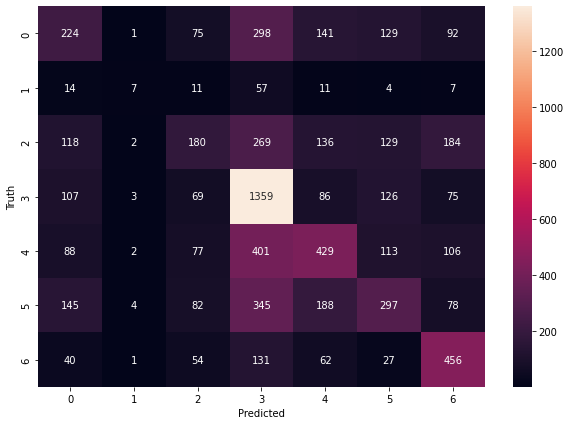

In [19]:
import seaborn as sn


plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

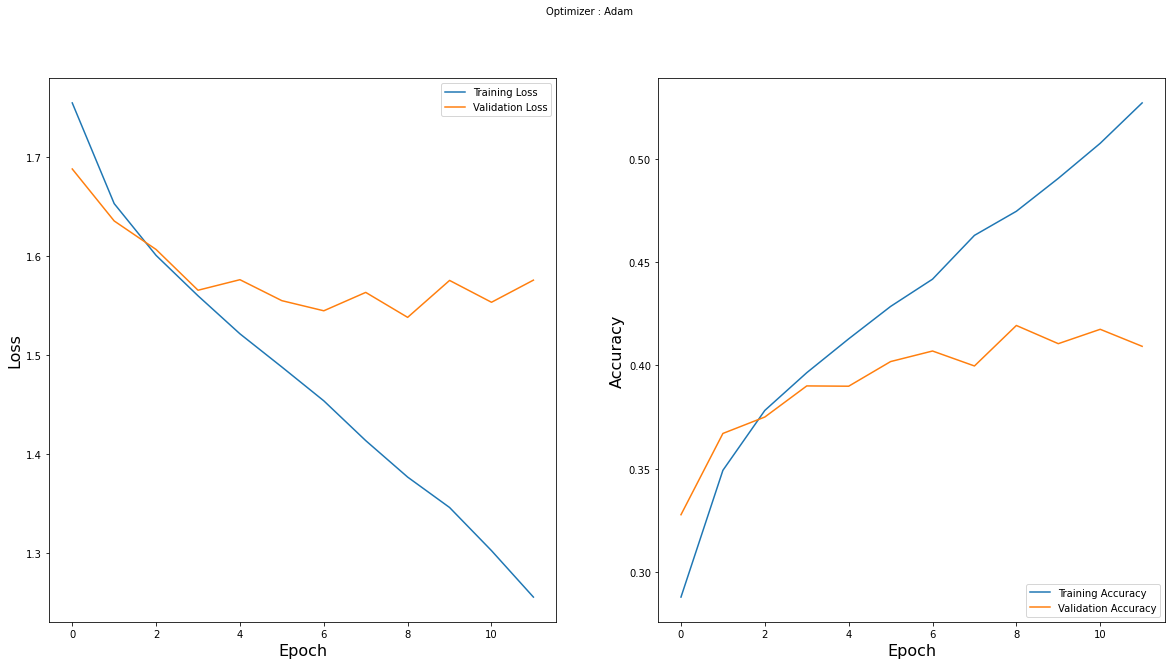

In [20]:
#plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()